In [7]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(load_boston()['filename'], skiprows=1)

Переменная, которую надо предсказать - 'MEDV'.

In [2]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Описание атрибутов (по порядку):
CRIM - Уровень преступности на душу населения по городам
ZN - доля жилой земли, зонированной для участков площадью более 25 000 кв. м.фут.
INDUS - доля акров нефинансового бизнеса в расчете на один город
CHAS - Фиктивная переменная Charles River (= 1, Если тракт граничит с рекой; 0 в противном случае)
NOX - Концентрация оксидов азота (частиц на 10 млн)
RМ - среднее количество комнат в жилом помещении
AGE - доля занятых собственниками объектов, построенных до 1940 года
DIS - взвешенные расстояния до пяти бостонских центров занятости
RAD - индекс доступности радиальных магистралей
TAX - Налог на недвижимость с полной стоимостью-ставка налога на 10 000 долларов США
PTRATIO - соотношение ученик-учитель по городам
B - 1000 (Bk - 0.63)^2, где Bk-доля чернокожих по городу
LSTAT - % более низкий статус населения
MEDV - медианная стоимость домов, занятых владельцами, в 1000 долларов США

In [9]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Проверим, нет ли в данных пропущенных значений.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Пропущенных значений нет!

Проверим данные на аномалии и выбросы

In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [110]:
feature_names = data.columns.tolist() 
for column in feature_names: 
    print(column)
    print(data[column].value_counts(dropna=False))

CRIM
14.33370    2
0.01501     2
0.08265     1
1.35472     1
0.03615     1
           ..
0.11460     1
0.03237     1
5.82115     1
0.02187     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64
ZN
0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64
INDUS
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64
CHAS
0    471
1     35
Name: CHAS, dtype: int64
NOX
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.435     1
0.422     1
0.518     1
0.385     1
0.389     1
Name: NOX, Length: 81, dtype: int64
RM
6.405    3
5.713    3
6.167  

Визуально сравним для примера взаимосвязь индекса преступности и стоимости недвижимости

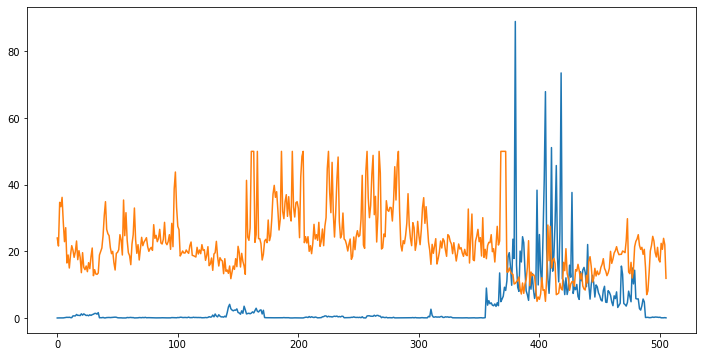

In [83]:
plt.figure(figsize=(12,6))
plt.plot(data.CRIM)
plt.plot(data.MEDV)

Видно что есть слабая взаимосвязь.

<Figure size 720x1152 with 0 Axes>

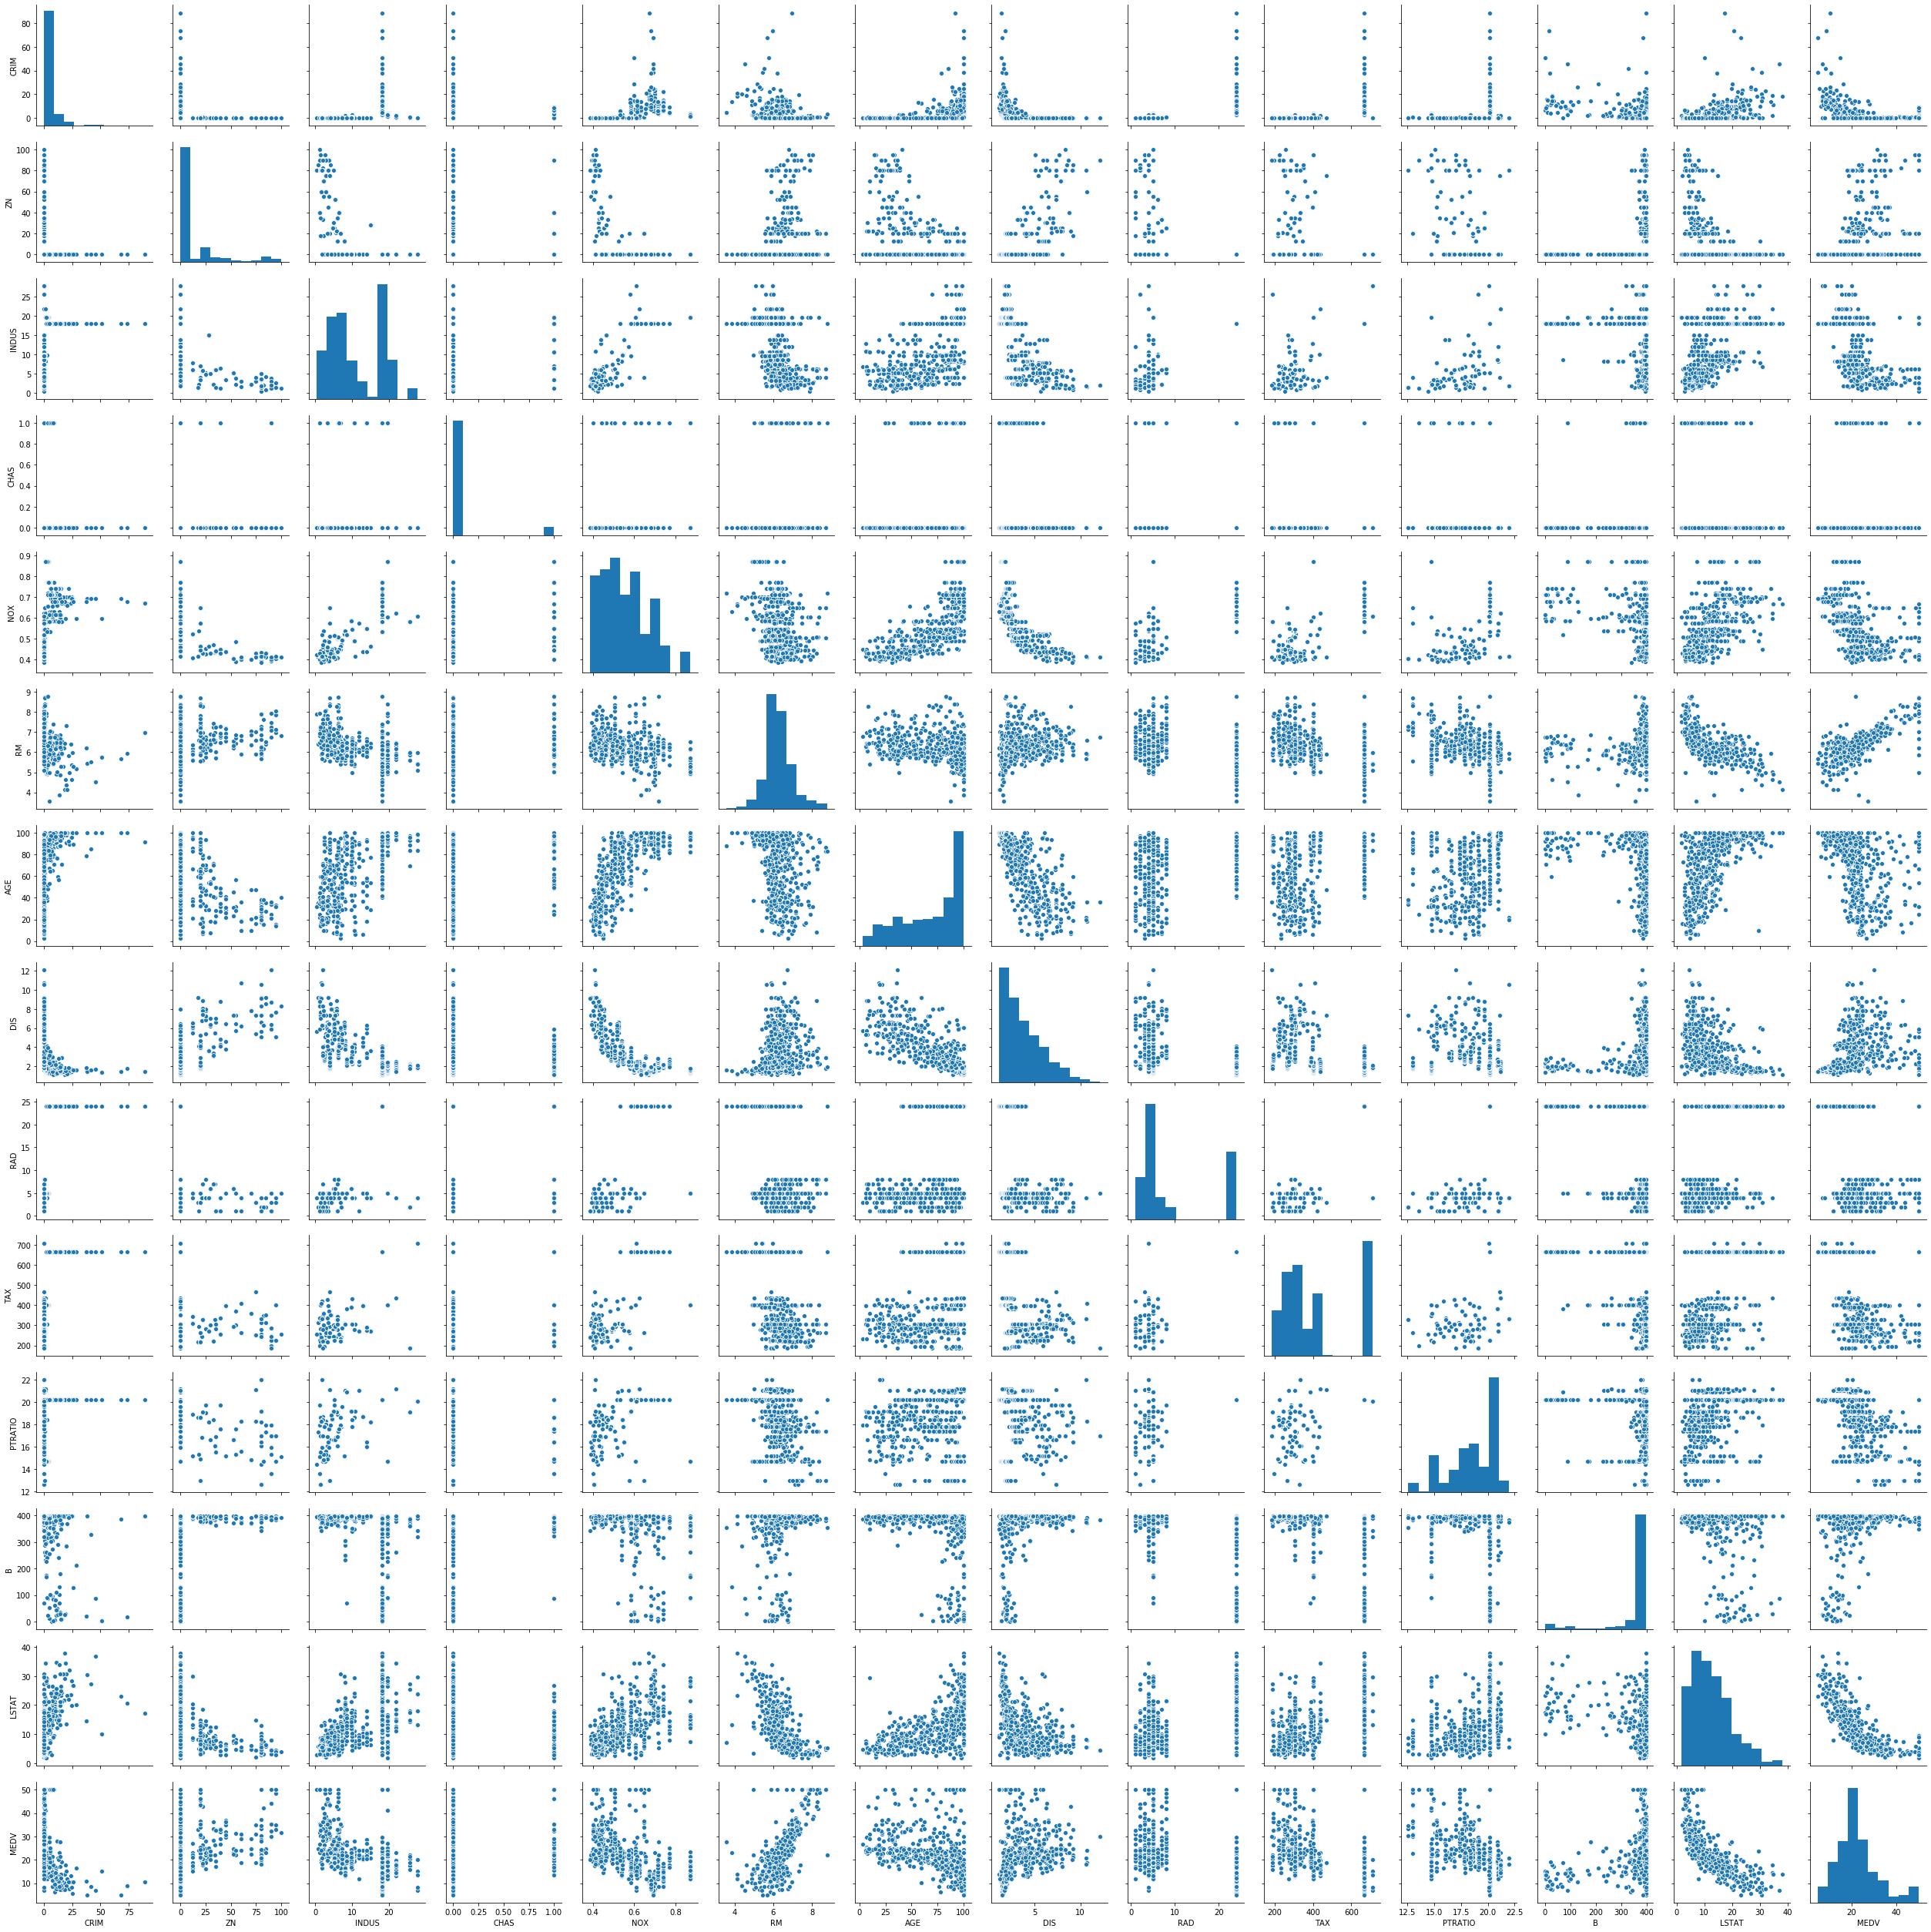

In [8]:
plt.figure(figsize=(10, 16))
sns.pairplot(data)
plt.show()

In [ ]:
Аномалий и выбросов в данных требующих очистки не обнаружил. Видимо данные почищены.
Однако по графикам видно, что наиболее дорогая недвижимость имеет немного неадекватные значения по многим атрибутам.
Можно отсеять наиболее дорогую недвижимость для большей точности модели, и рассмотреть её отдельно.

In [38]:
data.MEDV.value_counts()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: MEDV, Length: 229, dtype: int64

In [48]:
# Создадим второй датасет без самой дорогой недвижимости для сравнения
data1 = data.query('MEDV < 50')
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


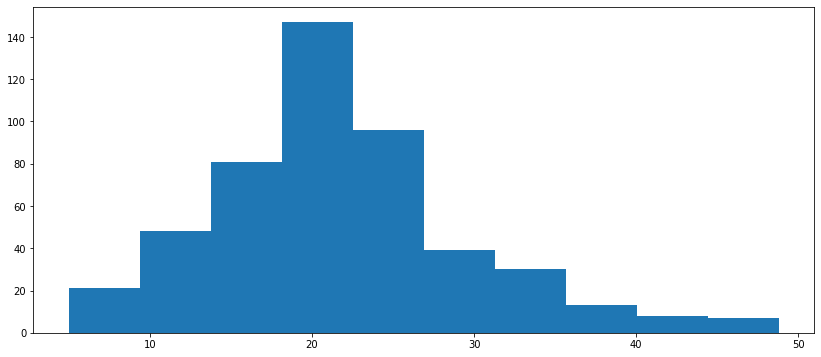

In [79]:
ax = plt.figure(figsize=(14,6))
plt.hist(data1['MEDV'])
plt.show()

<Figure size 720x1152 with 0 Axes>

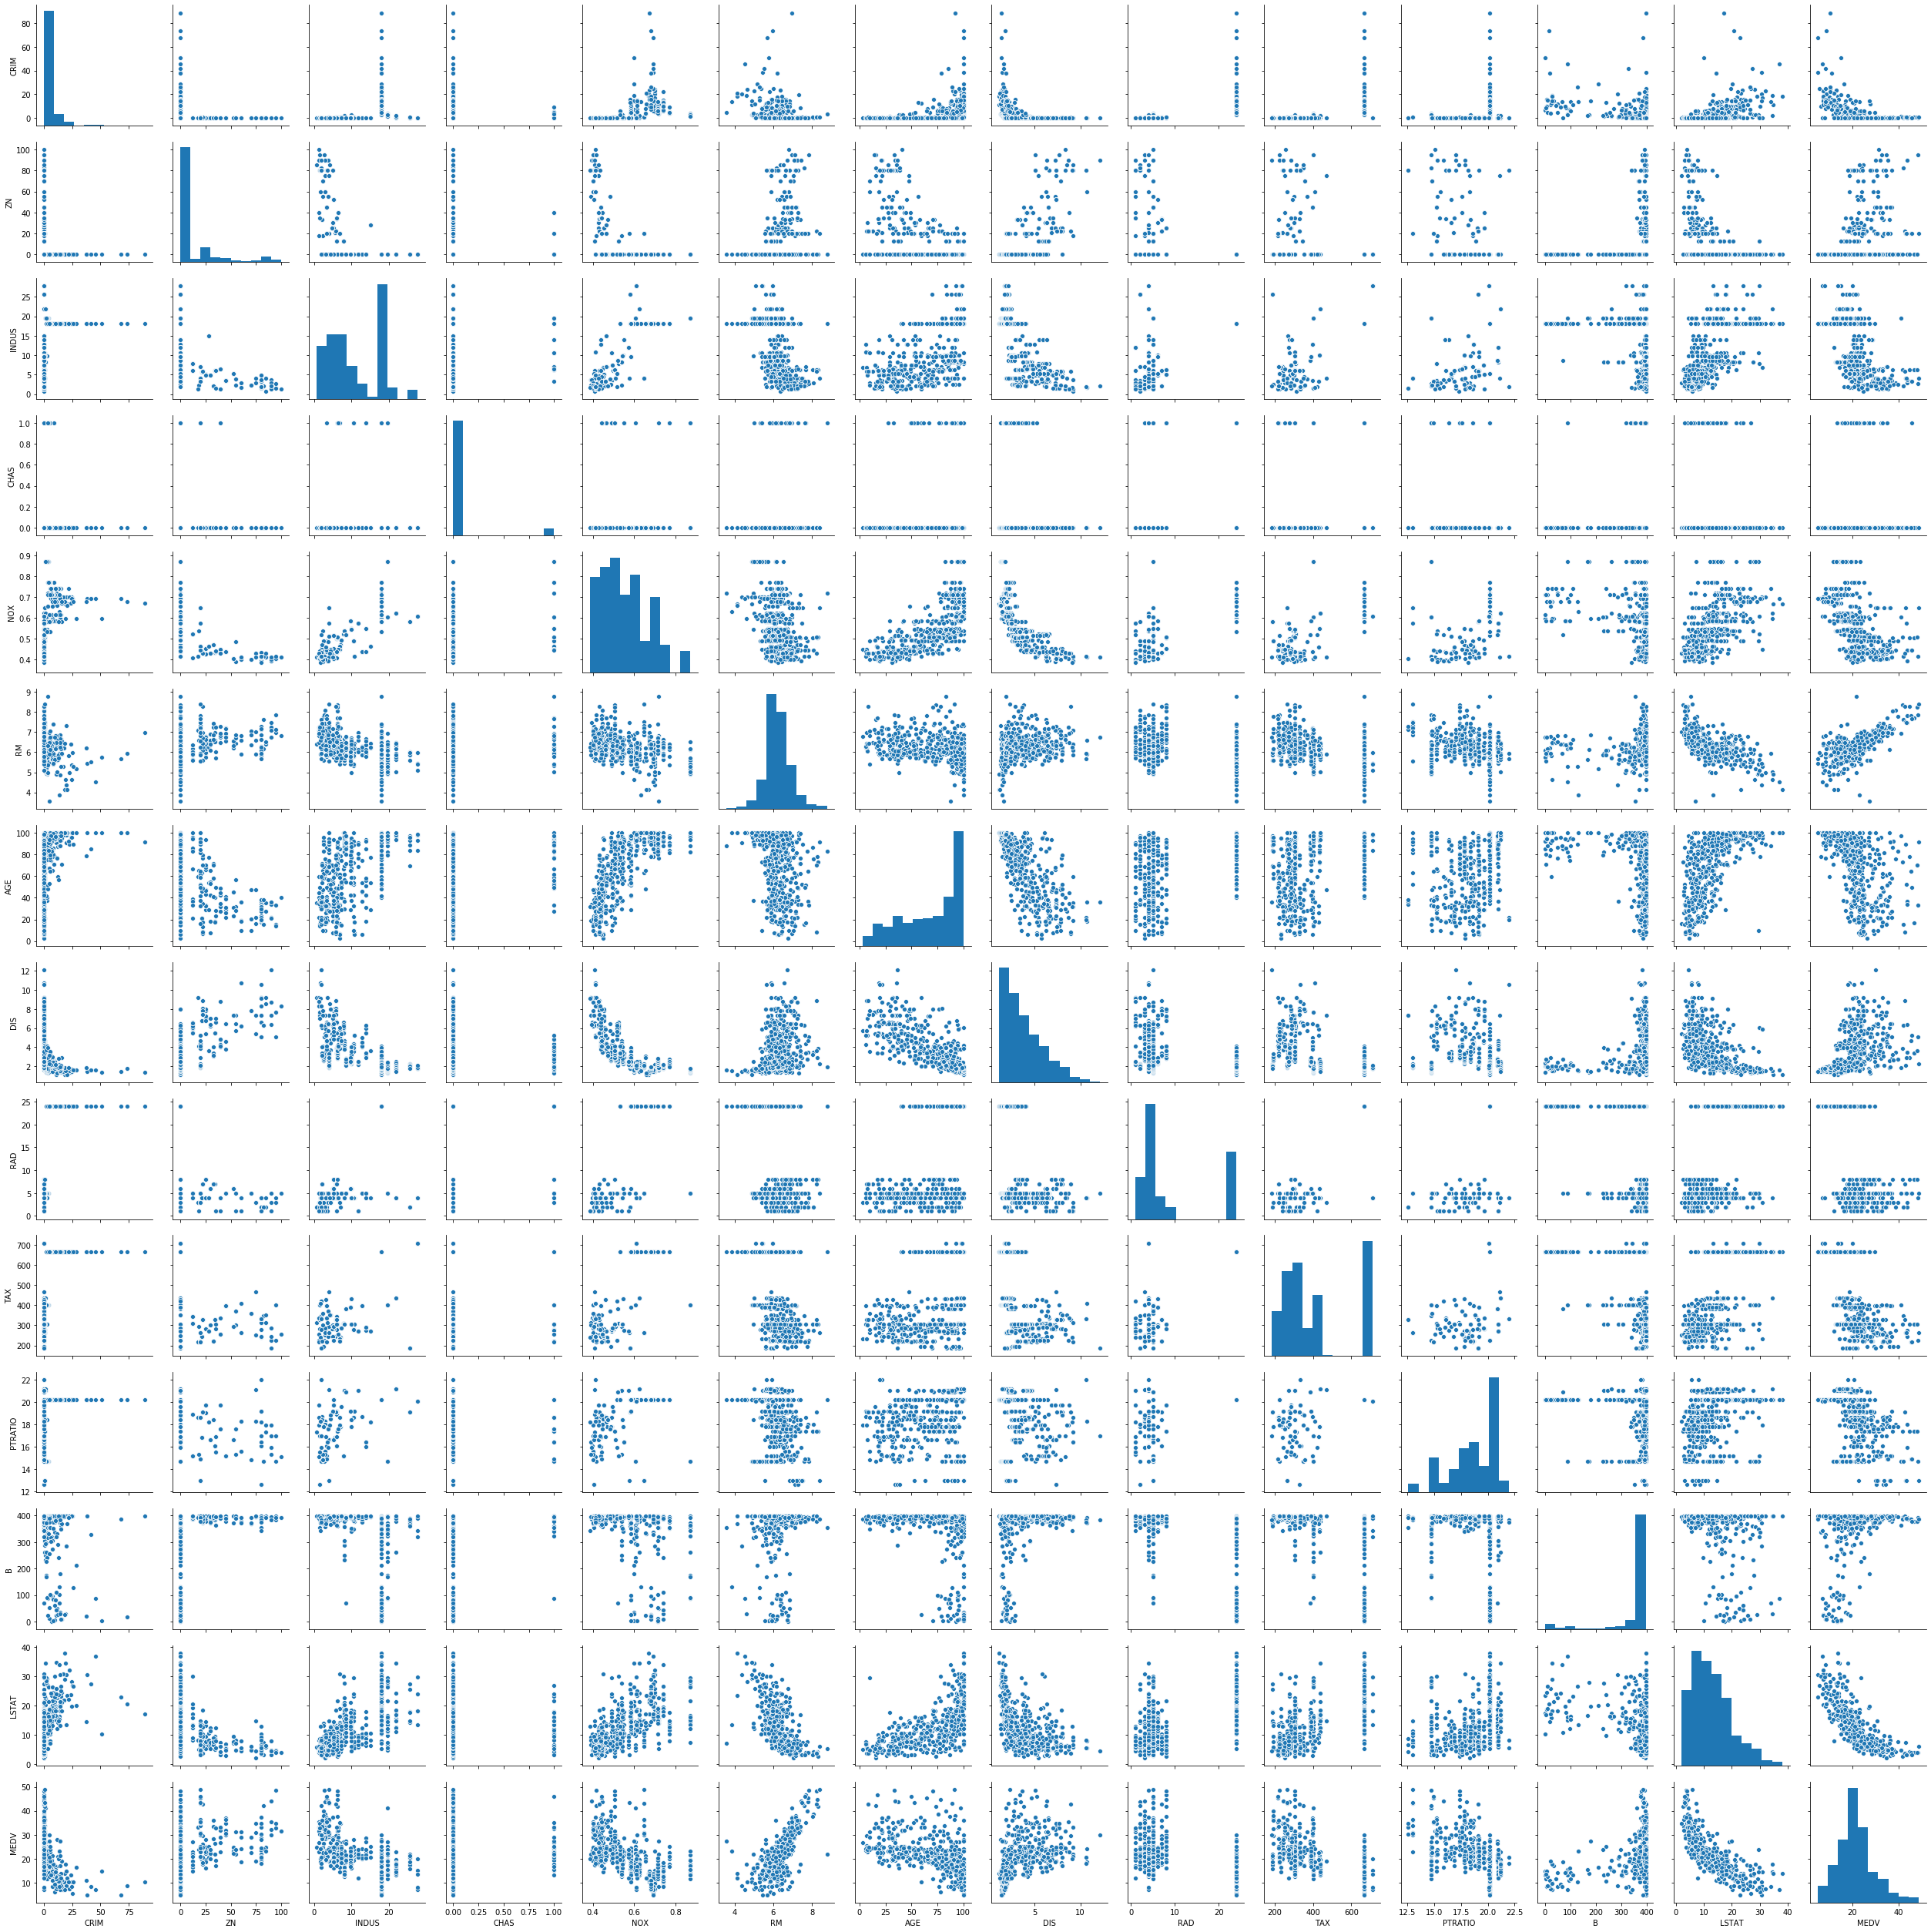

In [50]:
plt.figure(figsize=(10, 16))
sns.pairplot(data1)
plt.show()

In [ ]:
Построим матрицу корреляций и оценим взаимную зависимость признаков:

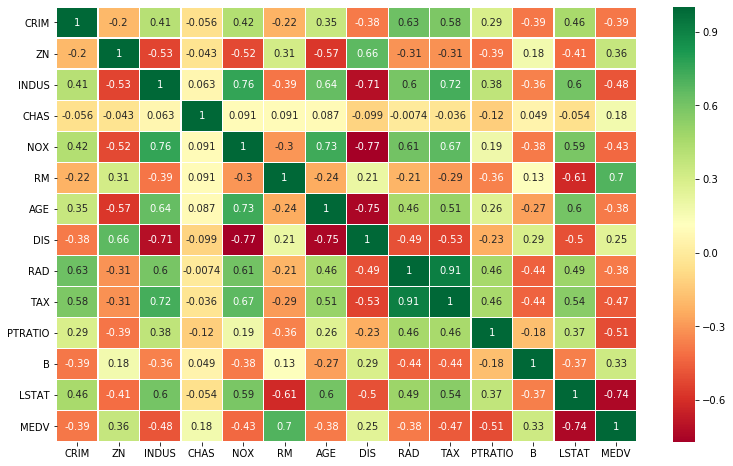

In [24]:
plt.figure(figsize=(13, 8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
plt.show()

Из этой матрицы можно сделать выводы: 
MEDV (медианная стоимость домов, занятых владельцами, в 1000 долларов США), которую мы предсказываем имеет наибольшую корреляцию с атрибутами: RМ - среднее количество комнат в жилом помещении, LSTAT - % более низкий статус населения, а так же PTRATIO - соотношение ученик-учитель по городам.
Наиболее низкая корреляция MDEV с атрибутами: B-доля чернокожих по городу, DIS-взвешенные расстояния до пяти бостонских центров занятости, CHAS-бинарная переменная(= 1, Если тракт граничит с рекой Charles River; 0 в противном случае)
Так же есть признаки которые сильно коррелируют между собой. То есть скорее всего являются избыточными: NOX/INDUS, AGE/INDUS, NOX/AGE
Признак TAX имеет сильную корреляцию с рядом признаков, но это скорее закономерность, чем избыточность.

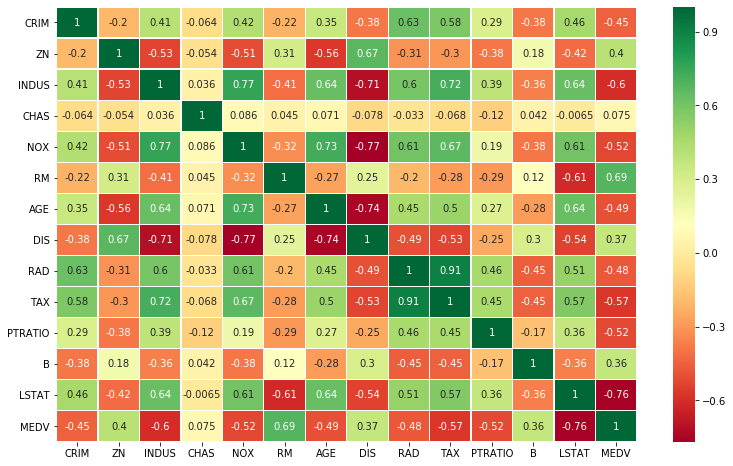

In [81]:
plt.figure(figsize=(13, 8))
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
plt.show()

In [ ]:
Значения корреляции для нового урезанного датасета изменились незначительно.

In [ ]:
На основе анализа выше составим список признаков, которые по нашему экспертному мнению будут влиять на стоимость недвижимости:

In [97]:
data_col1 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'RAD', 'TAX','PTRATIO', 'LSTAT']

Построим модели линейной регресии

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [90]:
# Вариант1 - выбераем для модели два атрибута с наибольшей корреляцией для data
X = data[['LSTAT','RM']].values
y = data['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data[['LSTAT','RM']])
mean_error0 = mean_absolute_error(pred_values, y)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.64235833  5.09478798]
Bias: -1.3582728118744818
3.9525800671192717
Error: 3.9525800671192717


In [91]:
err_dola0 = mean_error0/data['MEDV'].median()
err_dola0

0.18644245599619208

In [93]:
# Вариант2 - выбераем для модели два атрибута с наибольшей корреляцией для data1
X = data1[['LSTAT','RM']].values
y = data1['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data1[['LSTAT','RM']])
mean_error1 = mean_absolute_error(pred_values, y)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.60301444  4.27704494]
Bias: 2.717127353194531
Error: 3.466228332067589


In [94]:
err_dola1 = mean_error1/data1['MEDV'].median()
err_dola1

0.16584824555347316

Доля ошибки для data1 меньше, чем для data, поэтому выберем его для дальнейших тестов линейной регрессии

In [62]:
# Вариант3
X = data1[['LSTAT']].values
y = data1['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data1[['LSTAT']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.84373838]
Bias: 32.5404103783323
Error: 3.7960338449538065


In [63]:
# Вариант4
X = data1[['RM']].values
y = data1['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data1[['RM']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [8.26855732]
Bias: -30.00512014537584
Error: 4.1108370989454235


In [64]:
# Вариант5
X = data1[['LSTAT','RM','PTRATIO']].values
y = data1['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data1[['LSTAT','RM','PTRATIO']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.52223269  3.91110244 -0.95034129]
Bias: 21.558906466312948
Error: 3.1396139207320775


In [99]:
# Вариант5
X = data1[data_col1].values
y = data1['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data1[data_col1])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.09394813  0.00641464 -0.01786931  0.46138644  3.91490117  0.21746964
 -0.01495428 -0.80036951 -0.39995612]
Bias: 21.65197910416677
Error: 2.9925300175683294


In [106]:
# Список со всеми независимыми атрибутами
data_col2 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]

In [108]:
# Вариант6
X = data1[data_col2].values
y = data1['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data1[data_col2])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.06715912e-01  3.53133180e-02 -4.38830943e-02  4.52209315e-01
 -1.23981083e+01  3.75945346e+00 -2.36790549e-02 -1.21096549e+00
  2.51301879e-01 -1.37774382e-02 -8.38180086e-01  7.85316354e-03
 -3.50107918e-01]
Bias: 32.22984166993332
Error: 2.734360680576168


In [ ]:
Наименьшая абсолютная ошибка получилась у варианта6, когда мы учли в модели все атрибуты.

In [ ]:
Масштабируем данные 

In [123]:
headers = list(data.columns.values)

In [135]:
# Feature scaling with MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 
min_max_scaler = MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(data1)
data_mms = pd.DataFrame(np_scaled)
data_mms.columns = headers
data_mms.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.058148,0.0,0.314815,0.577505,0.641607,0.268711,0.000000,0.208015,0.287234,1.000000,0.083356,0.433790
1,0.000236,0.00,0.234444,0.0,0.172840,0.547998,0.782698,0.348524,0.043478,0.104962,0.553191,1.000000,0.198944,0.378995
2,0.000236,0.00,0.234444,0.0,0.172840,0.694386,0.599382,0.348524,0.043478,0.104962,0.553191,0.989737,0.056960,0.678082
3,0.000293,0.00,0.053333,0.0,0.150206,0.658555,0.441813,0.448173,0.086957,0.066794,0.648936,0.994276,0.026674,0.648402
4,0.000705,0.00,0.053333,0.0,0.150206,0.687105,0.528321,0.448173,0.086957,0.066794,0.648936,1.000000,0.093081,0.712329


In [136]:
data_mms.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.040878,0.111122,0.384190,0.059184,0.348369,0.514365,0.673316,0.245463,0.370186,0.421760,0.629787,0.896504,0.304085,0.379815
std,0.098035,0.228446,0.252641,0.236209,0.240098,0.125148,0.290060,0.191997,0.377882,0.320735,0.224519,0.233583,0.196810,0.179573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.164815,0.000000,0.131687,0.444530,0.428939,0.088635,0.130435,0.177958,0.510638,0.947079,0.149139,0.267123
50%,0.002711,0.000000,0.331481,0.000000,0.314815,0.502778,0.761071,0.194631,0.173913,0.272901,0.691489,0.987064,0.269380,0.363014
75%,0.040925,0.125000,0.642963,0.000000,0.491770,0.578080,0.936921,0.371045,1.000000,0.914122,0.808511,0.998544,0.420603,0.449201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# Вариант7 - Нормированные MinMaxScaler данные data1
X = data_mms[data_col2].values
y = data_mms['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data_mms[data_col2])
mean_error_mms = mean_absolute_error(pred_values, y)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.21676945  0.08062401 -0.02705122  0.01032441 -0.13756805  0.44795862
 -0.05249398 -0.30383345  0.13196217 -0.16482597 -0.1798834   0.0711052
 -0.28768   ]
Bias: 0.47462214576478173
Error: 0.06242832604055178


In [138]:
err_mms_dola = mean_error_mms/data_mms['MEDV'].median()
err_mms_dola

0.17197236984755773

In [140]:
# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 
ss_scaler = StandardScaler()

np_scaled = ss_scaler.fit_transform(data1)
data_ss = pd.DataFrame(np_scaled)
data_ss.columns = headers
data_ss.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.417401,0.301813,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.980635,-0.667101,-1.527280,0.443535,-1.122679,0.300878
1,-0.414992,-0.486924,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.865459,-0.988734,-0.341504,0.443535,-0.534772,-0.004571
2,-0.414995,-0.486924,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.865459,-0.988734,-0.341504,0.399553,-1.256937,1.662674
3,-0.414412,-0.486924,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-0.750284,-1.107857,0.085376,0.419005,-1.410980,1.497222
4,-0.410202,-0.486924,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-0.750284,-1.107857,0.085376,0.443535,-1.073216,1.853580


In [141]:
data_ss.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02,4.900000e+02
mean,-5.313210e-17,-9.131018e-17,6.598463e-16,-5.254300e-16,6.420035e-16,4.013796e-16,1.895309e-16,-1.783154e-16,1.231215e-15,9.538855e-16,2.646409e-16,5.573773e-17,3.375984e-17,2.356392e-17
std,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00,1.001022e+00
min,-4.174013e-01,-4.869242e-01,-1.522252e+00,-2.508121e-01,-1.452426e+00,-4.114256e+00,-2.323674e+00,-1.279783e+00,-9.806346e-01,-1.316322e+00,-2.807918e+00,-3.841978e+00,-1.546651e+00,-2.117264e+00
25%,-4.087105e-01,-4.869242e-01,-8.692176e-01,-2.508121e-01,-9.033934e-01,-5.585936e-01,-8.433661e-01,-8.176648e-01,-6.351090e-01,-7.609107e-01,-5.312277e-01,2.167400e-01,-7.880951e-01,-6.281975e-01
50%,-3.897205e-01,-4.869242e-01,-2.088454e-01,-2.508121e-01,-1.398948e-01,-9.267930e-02,3.028508e-01,-2.650254e-01,-5.199338e-01,-4.645921e-01,2.751001e-01,3.880988e-01,-1.765163e-01,-9.366081e-02
75%,4.798451e-04,6.080963e-02,1.025317e+00,-2.508121e-01,5.978679e-01,5.096376e-01,9.097238e-01,6.547516e-01,1.668395e+00,1.536675e+00,7.968416e-01,4.372940e-01,5.926385e-01,3.867859e-01
max,9.793471e+00,3.894946e+00,2.439981e+00,3.987048e+00,2.716791e+00,3.884451e+00,1.127416e+00,3.933963e+00,1.668395e+00,1.804702e+00,1.650600e+00,4.435345e-01,3.539593e+00,3.457190e+00


In [142]:
# Вариант8 - Нормированные StandardScaler данные data1
X = data_ss[data_col2].values
y = data_ss['MEDV'].values

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Weights: {}'.format(slr.coef_))
print('Bias: {}'.format(slr.intercept_))

pred_values = slr.predict(data_ss[data_col2])
mean_error_ss = mean_absolute_error(pred_values, y)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-0.11834164  0.1025669  -0.03805828  0.01358067 -0.18393546  0.31219107
 -0.08479213 -0.32485393  0.27769304 -0.29439531 -0.22490695  0.09249132
 -0.31529338]
Bias: -1.12073514757519e-16
Error: 0.34800385904540815


In [145]:
err_ss_dola = mean_error_ss/data_ss['MEDV'].median()
err_ss_dola

-3.715576077322018

Не увидел уменьшения доли средней абсолютной ошибки относительно медианного значенния 'MEDV' при нормализации (масштабировании) данных двумя методами: 'StandardScaler' и 'MinMaxScaler'.